https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('data/temps.csv')
df.head()

year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41

### 2. Lidia con las variables categóricas del dataset

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [84]:
df.describe()

year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179  
min     35.000000      41.000000     46.000000       44.000000   28.000000  
25%     54.000000      48.000000     53.000000       50.000000   47.750000  
50%     62.500000      56.000000     61.000000       58.000000   60.000000  
75%     71.000000      66.000000     72.000000       69.000000   71.000000  
max     92.000000      77.000000     82.000000       79.000000   95.000000

In [85]:
# unicos
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [86]:
# valores
df["week"].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [87]:
# clases
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [88]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder() # mejor hacer el get dummies porque un 7 pesa másque el 1 y tal

# df["week"] = le.fit_transform(df["week"])
# df["week"].values

In [89]:
# dummies

pd.get_dummies(df["week"])
df = pd.concat([df, pd.get_dummies(df["week"])], axis=1).drop("week", axis=1)




In [90]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6

In [91]:
df

year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1      45      45     45.6      45             43   
1    2016      1    2      44      45     45.7      44             41   
2    2016      1    3      45      44     45.8      41             43   
3    2016      1    4      44      41     45.9      40             44   
4    2016      1    5      41      40     46.0      44             46   
..    ...    ...  ...     ...     ...      ...     ...            ...   
343  2016     12   27      42      42     45.2      47             41   
344  2016     12   28      42      47     45.3      48             41   
345  2016     12   29      47      48     45.3      48             43   
346  2016     12   30      48      48     45.4      57             44   
347  2016     12   31      48      57     45.5      40             42   

     forecast_acc  forecast_under  friend  Fri  Mon  Sat  Sun  Thurs  Tues  \
0              50              44      29    1    0    0    0      0     0   
1              50              44      61    0    0    1    0      0     0   
2              46              47      56    0    0    0    1      0     0   
3              48              46      53    0    1    0    0      0     0   
4              46              46      41    0    0    0    0      0     1   
..            ...             ...     ...  ...  ...  ...  ...    ...   ...   
343            50              47      47    0    0    0    0      0     1   
344            49              44      58    0    0    0    0      0     0   
345            50              45      65    0    0    0    0      1     0   
346            46              44      42    1    0    0    0      0     0   
347            48              47      57    0    0    1    0      0     0   

     Wed  
0      0  
1      0  
2      0  
3      0  
4      0  
..   ...  
343    0  
344    1  
345    0  
346    0  
347    0  

[348 rows x 18 columns]

In [92]:
# agurpar por mes y quedarse con la media de la columna temp_1
df.groupby("month", as_index=False)[["month","temp_1"]].mean()


month     temp_1
0     1.0  49.677419
1     2.0  54.115385
2     3.0  56.483871
3     4.0  66.433333
4     5.0  68.838710
5     6.0  73.233333
6     7.0  76.225806
7     8.0  77.947368
8     9.0  70.428571
9    10.0  63.900000
10   11.0  56.966667
11   12.0  43.741935

In [93]:
# merge del dataframe anterior con el original
df = df.merge(df.groupby("month", as_index=False)[["month","temp_1"]].mean(), on=["month"])

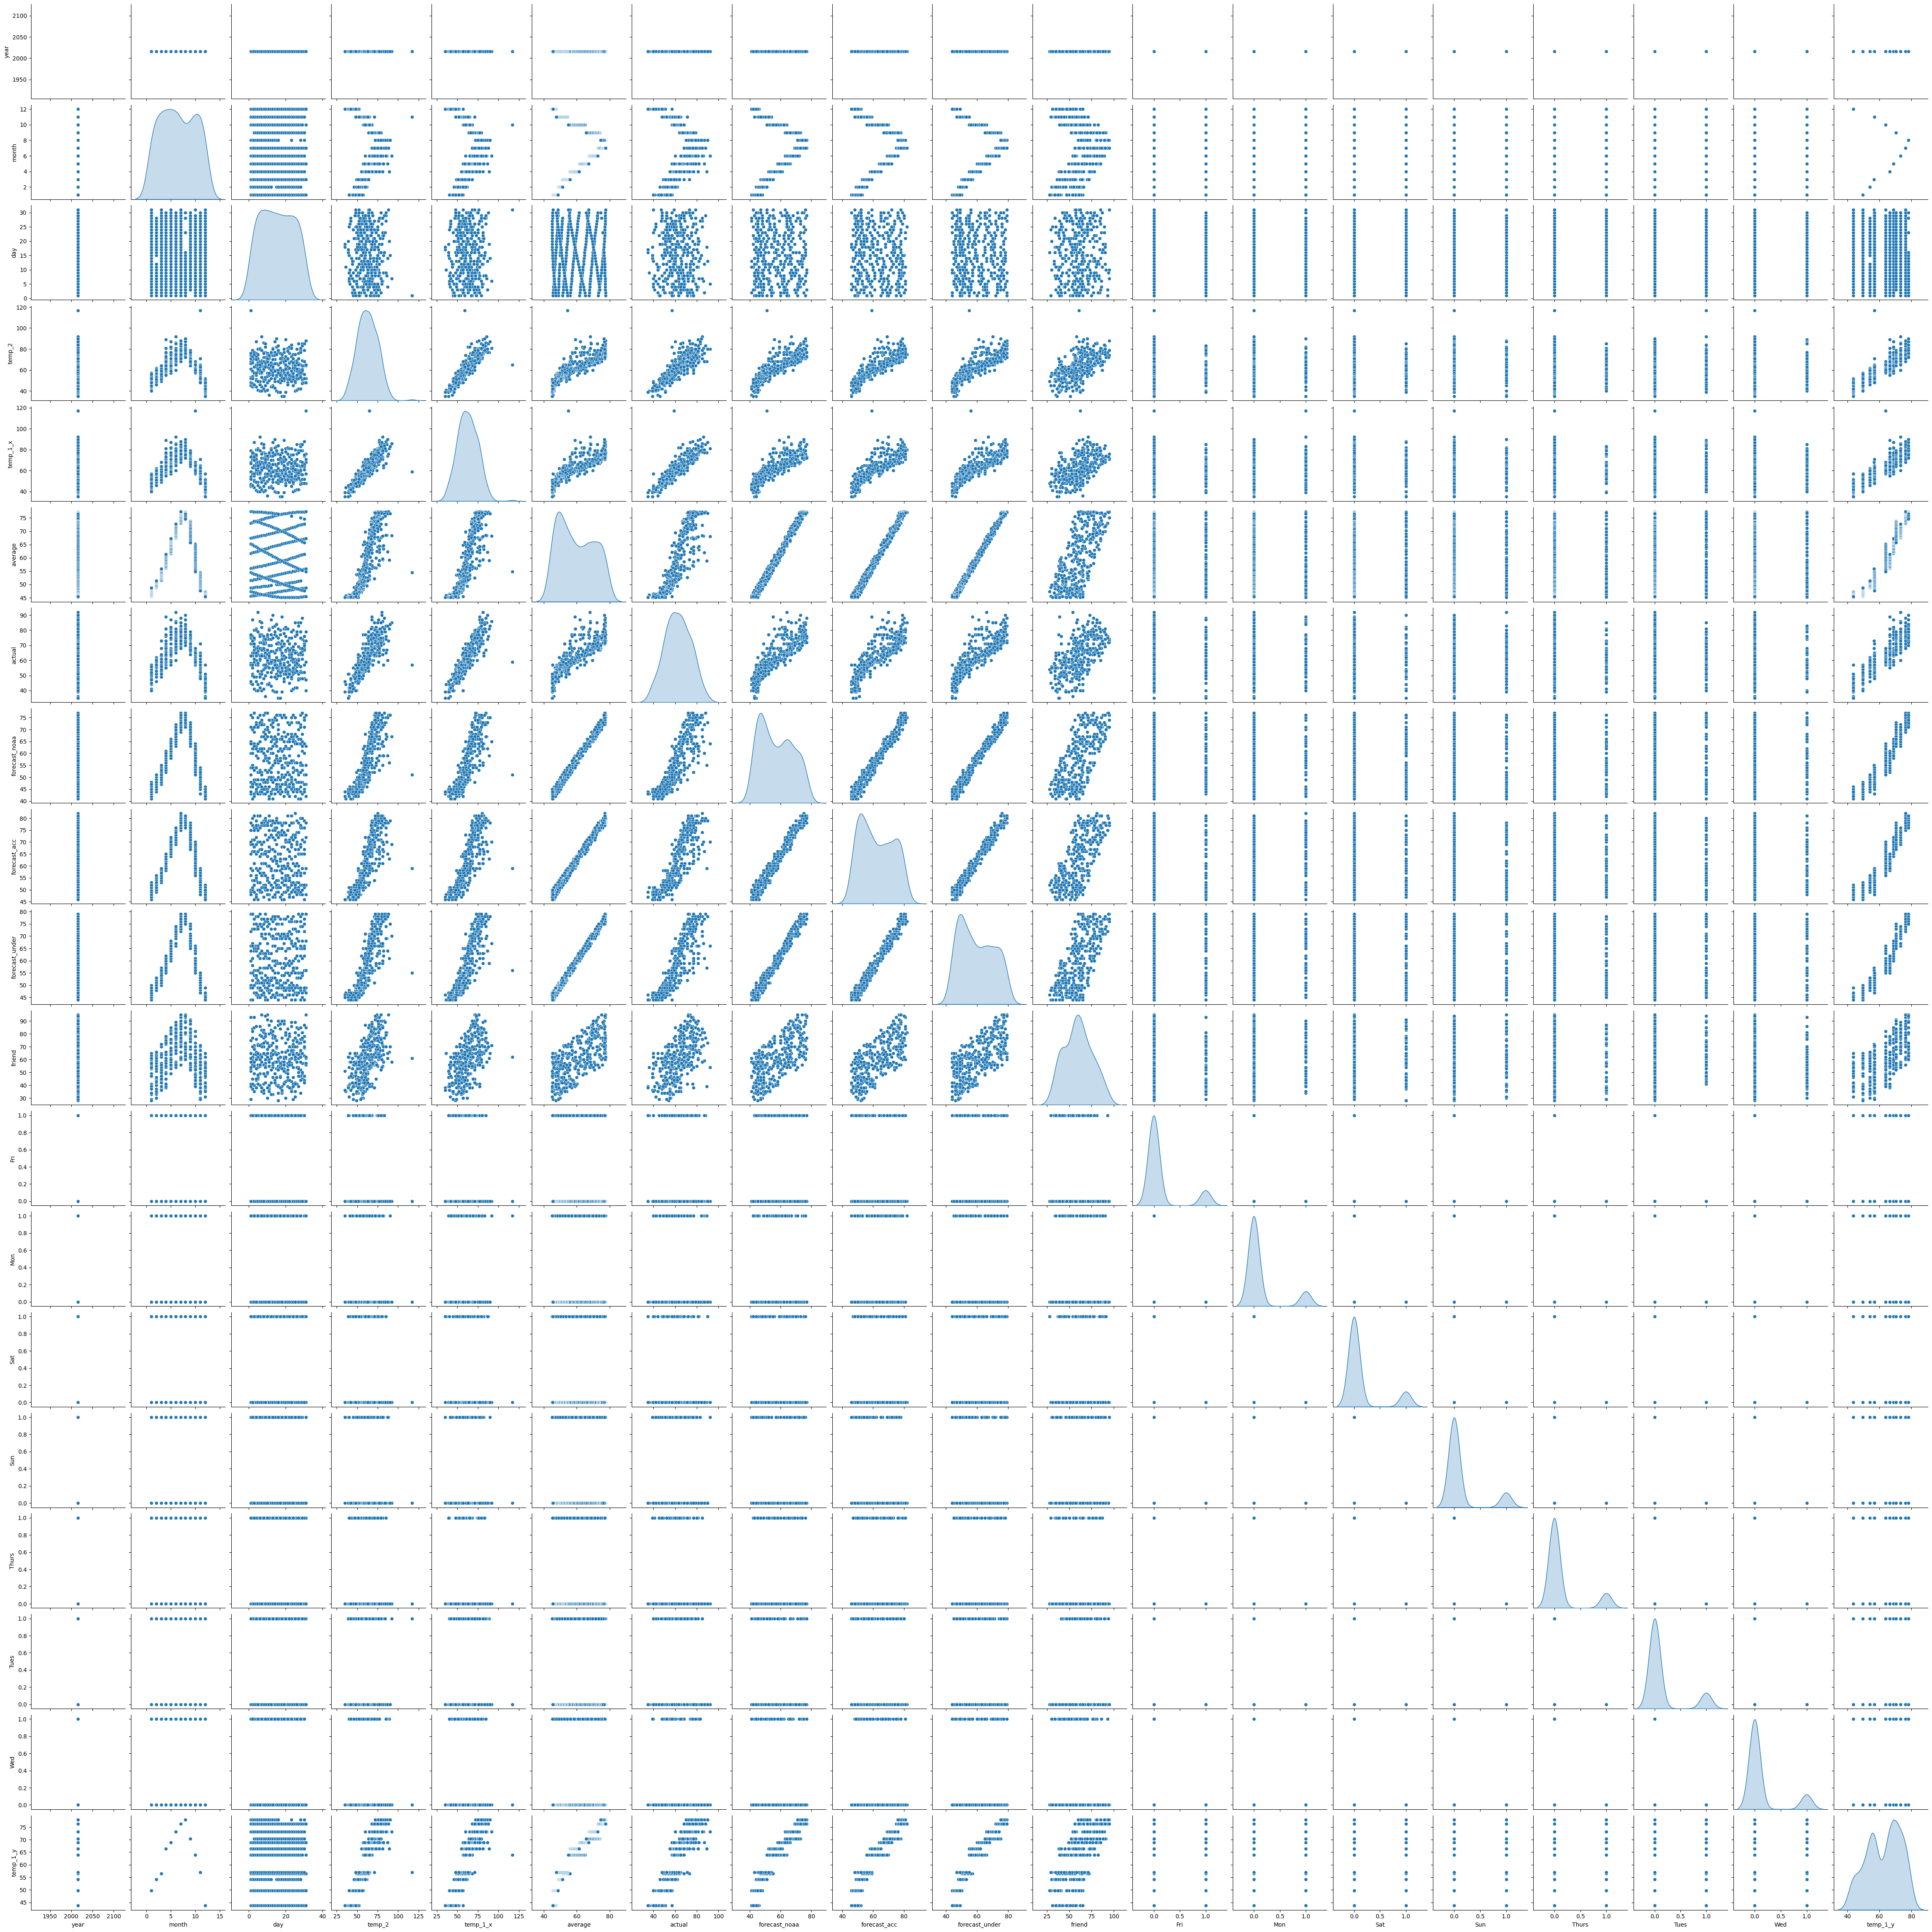

In [94]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde')

<AxesSubplot:>

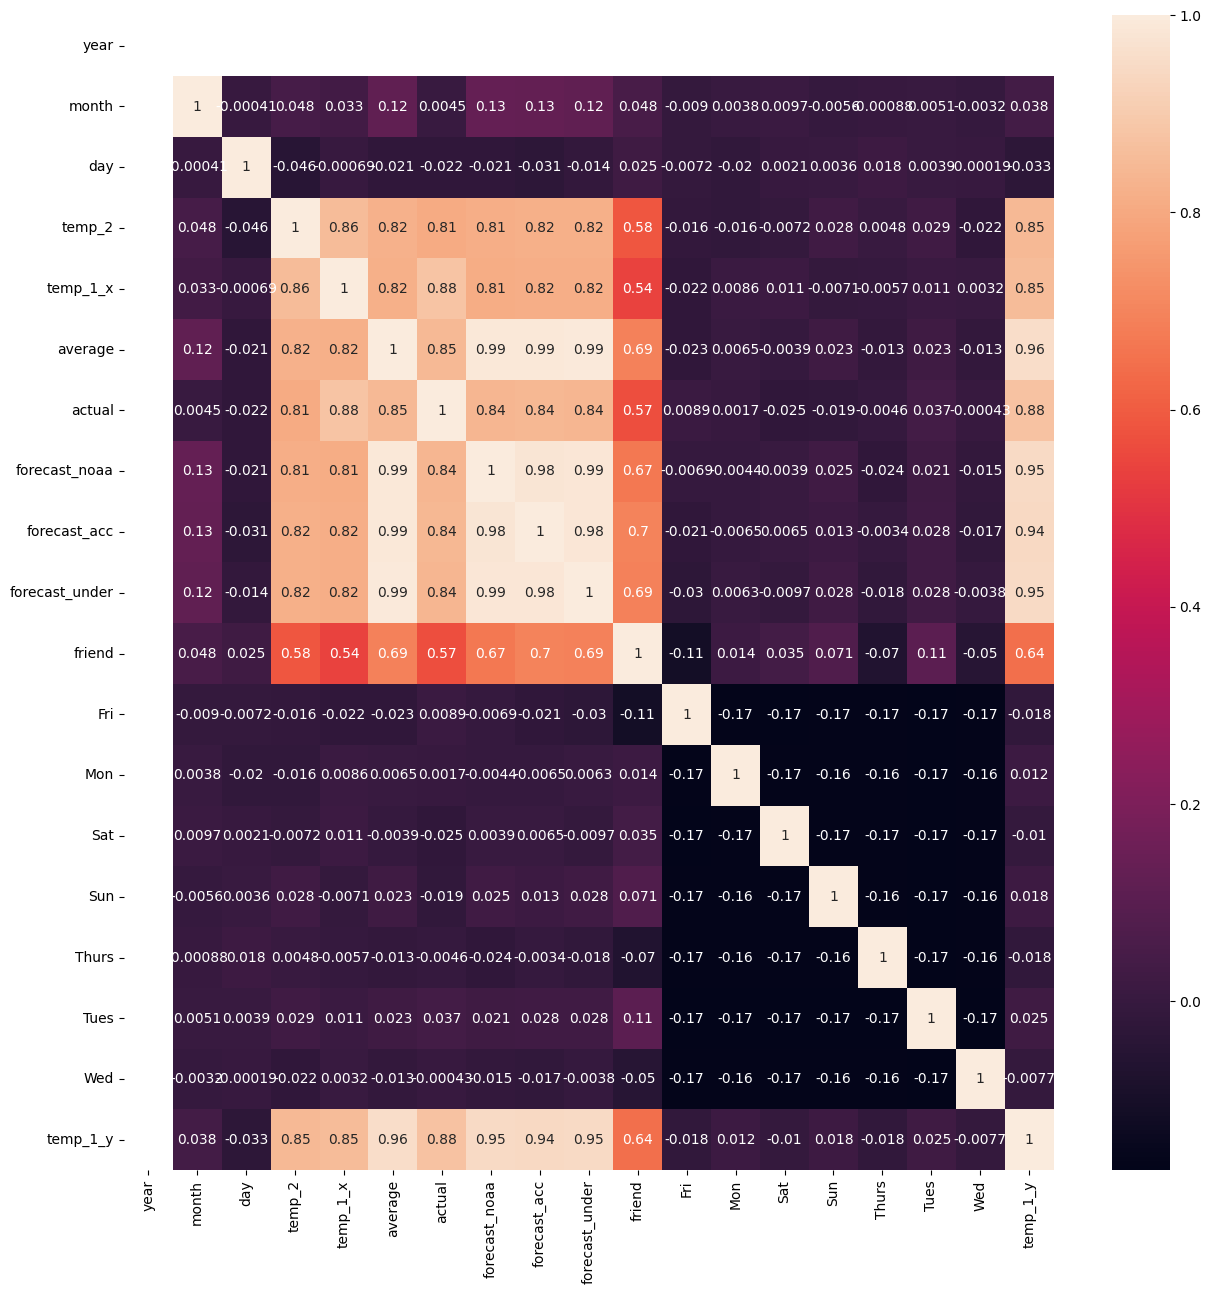

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['actual'], axis=1), df['actual'], test_size=0.2, random_state=42)


### 4. Entrena el modelo


In [97]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [98]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'temp_1_y'],
      dtype='object')

In [99]:
dtr.feature_importances_

array([0.00000000e+00, 1.30164782e-02, 1.90692319e-02, 1.36280543e-02,
       7.58894934e-01, 9.67444214e-02, 1.51681399e-02, 1.89935875e-02,
       2.45613830e-02, 2.08922716e-02, 2.73262897e-04, 9.18803349e-03,
       5.22669509e-04, 4.34618131e-04, 3.26041054e-03, 1.67774743e-03,
       1.59839172e-03, 2.07636426e-03])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [100]:
y_pred = dtr.predict(X_test)
y_pred

array([79., 71., 52., 61., 72., 63., 73., 73., 68., 67., 61., 67., 40.,
       68., 70., 55., 60., 56., 55., 71., 59., 55., 70., 58., 63., 48.,
       71., 50., 60., 83., 66., 67., 57., 79., 73., 60., 54., 52., 67.,
       40., 77., 59., 81., 41., 58., 89., 54., 85., 51., 40., 40., 43.,
       64., 66., 71., 60., 55., 65., 51., 60., 64., 49., 57., 71., 63.,
       53., 76., 67., 80., 40.])

In [101]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6524234321544085
MAE 5.057142857142857
MAPE 0.07897579899613436
MSE 48.6
RMSE 6.971370023173351


### 6. Representa el árbol de decision

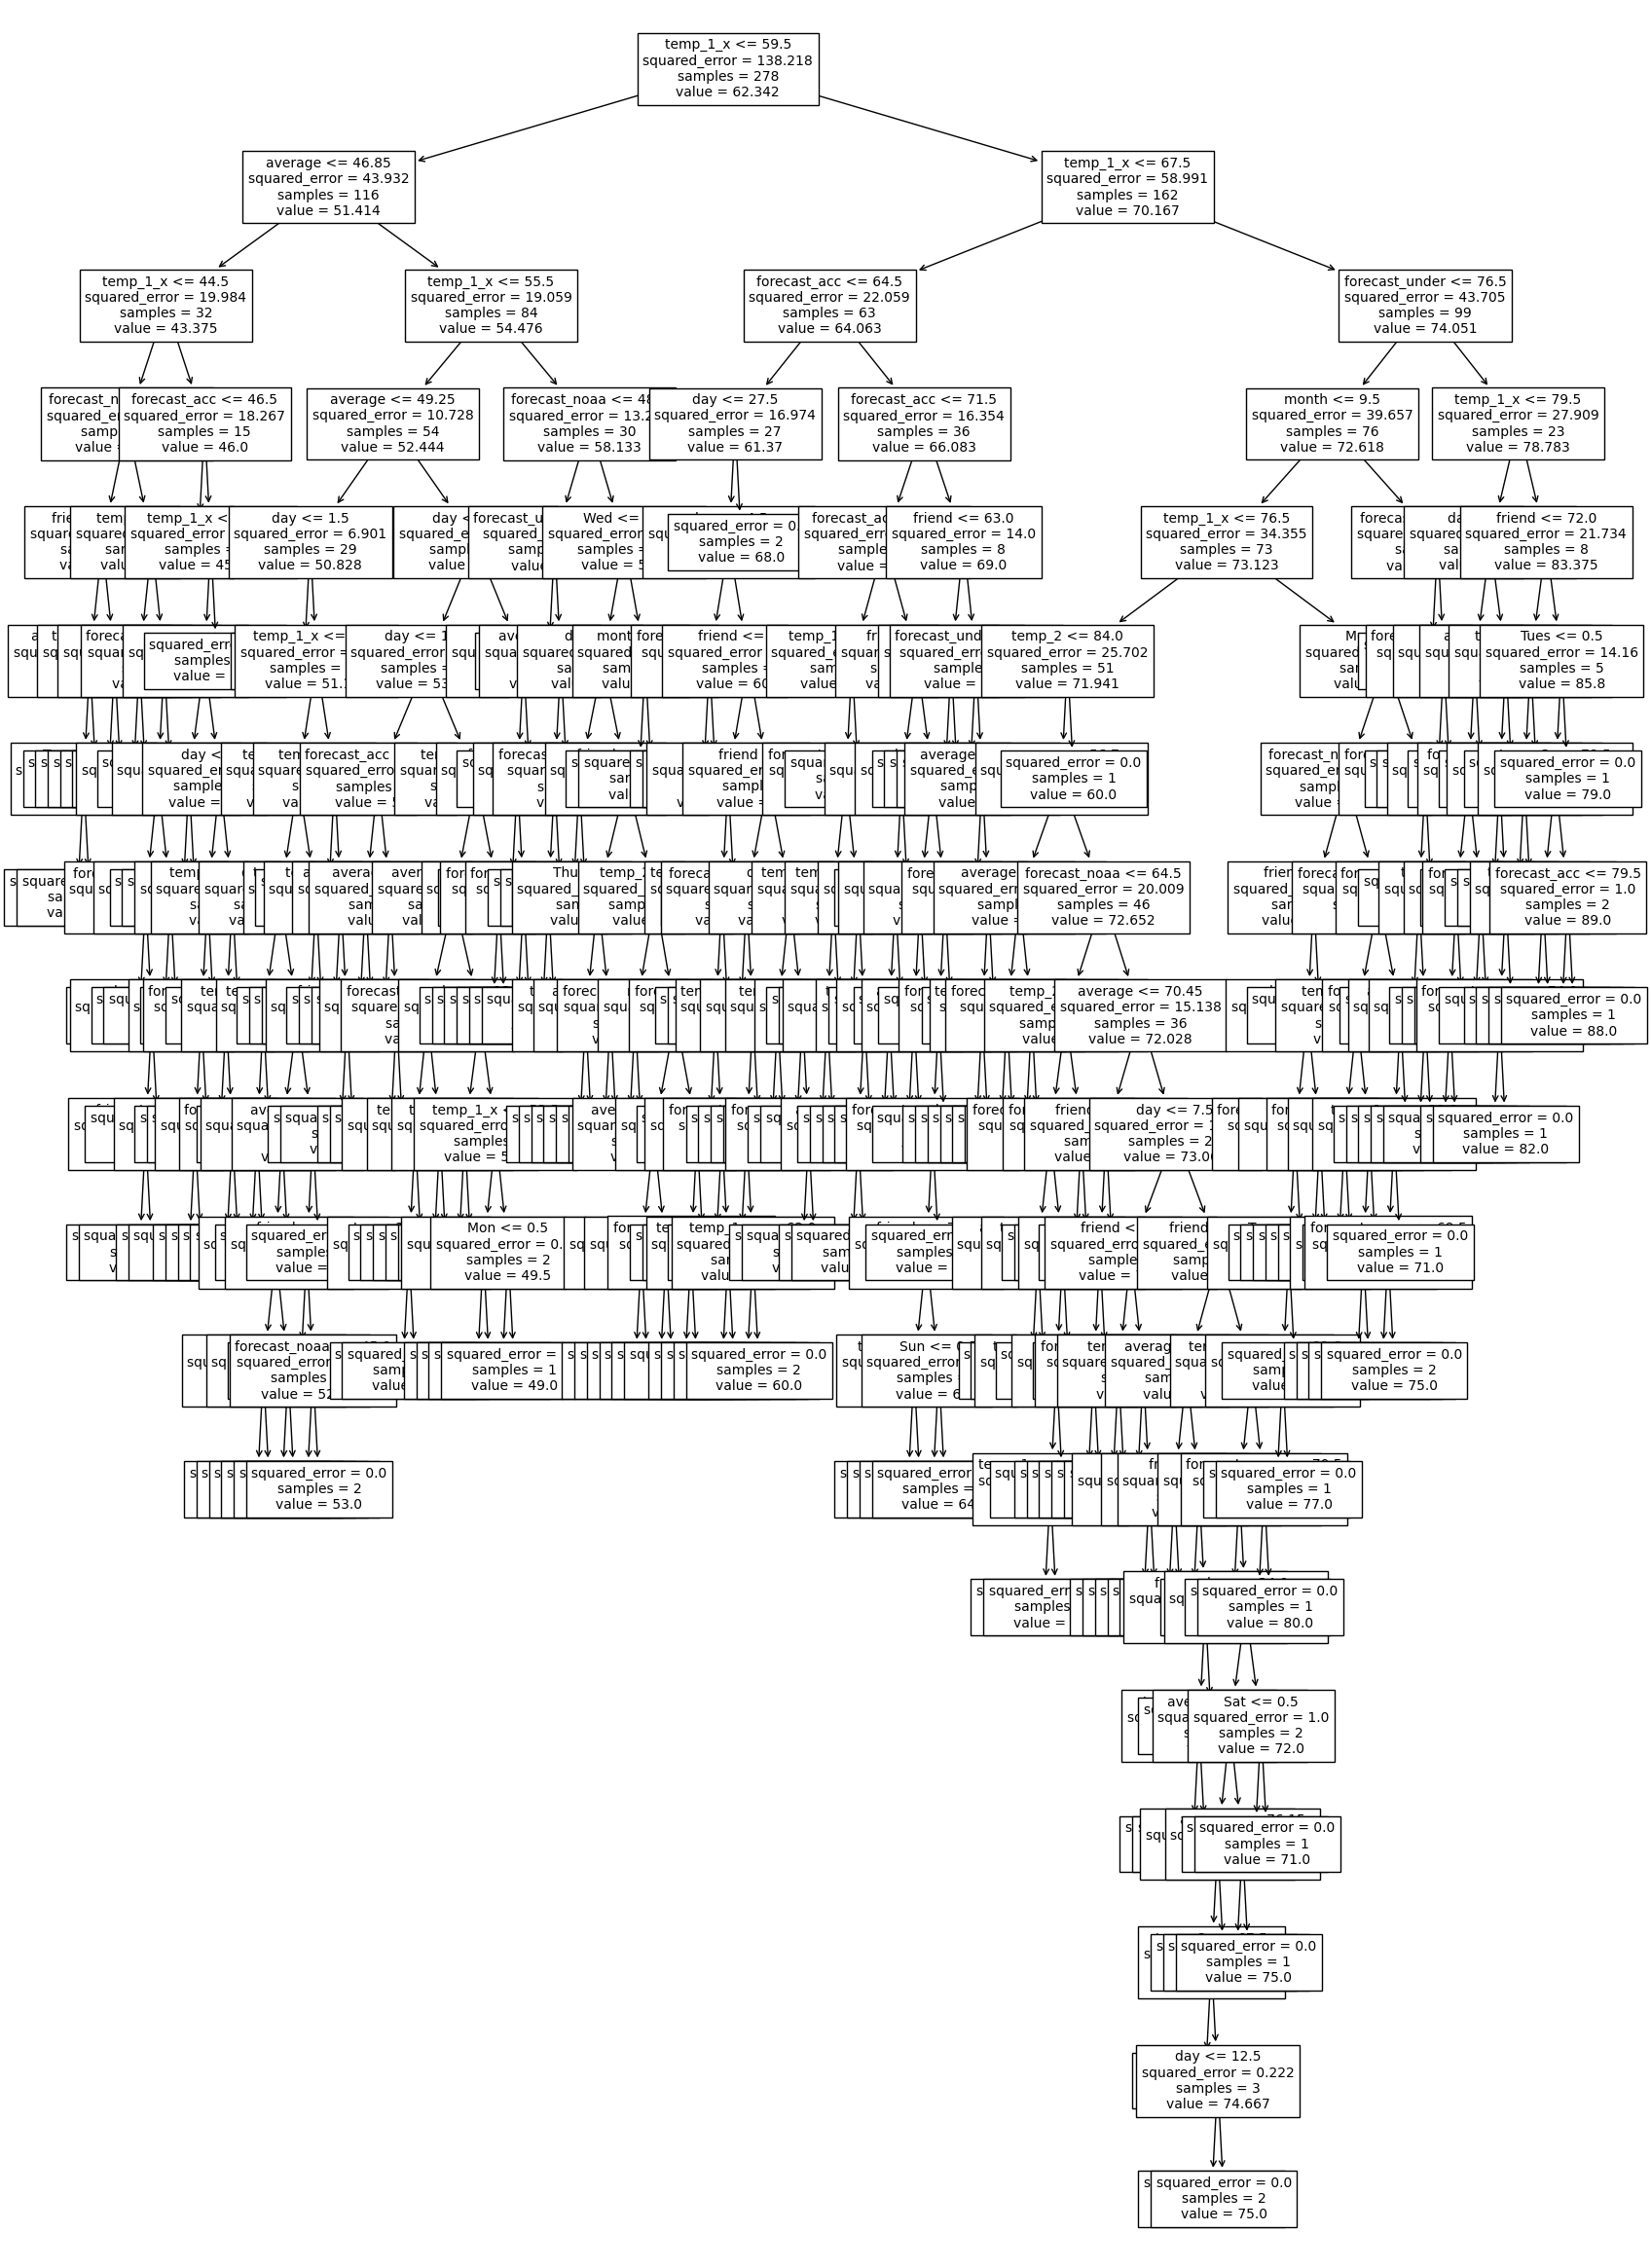

In [102]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [103]:
dtr_3 = DecisionTreeRegressor(max_depth= 3)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [104]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 9. Vuelve a representar su árbol

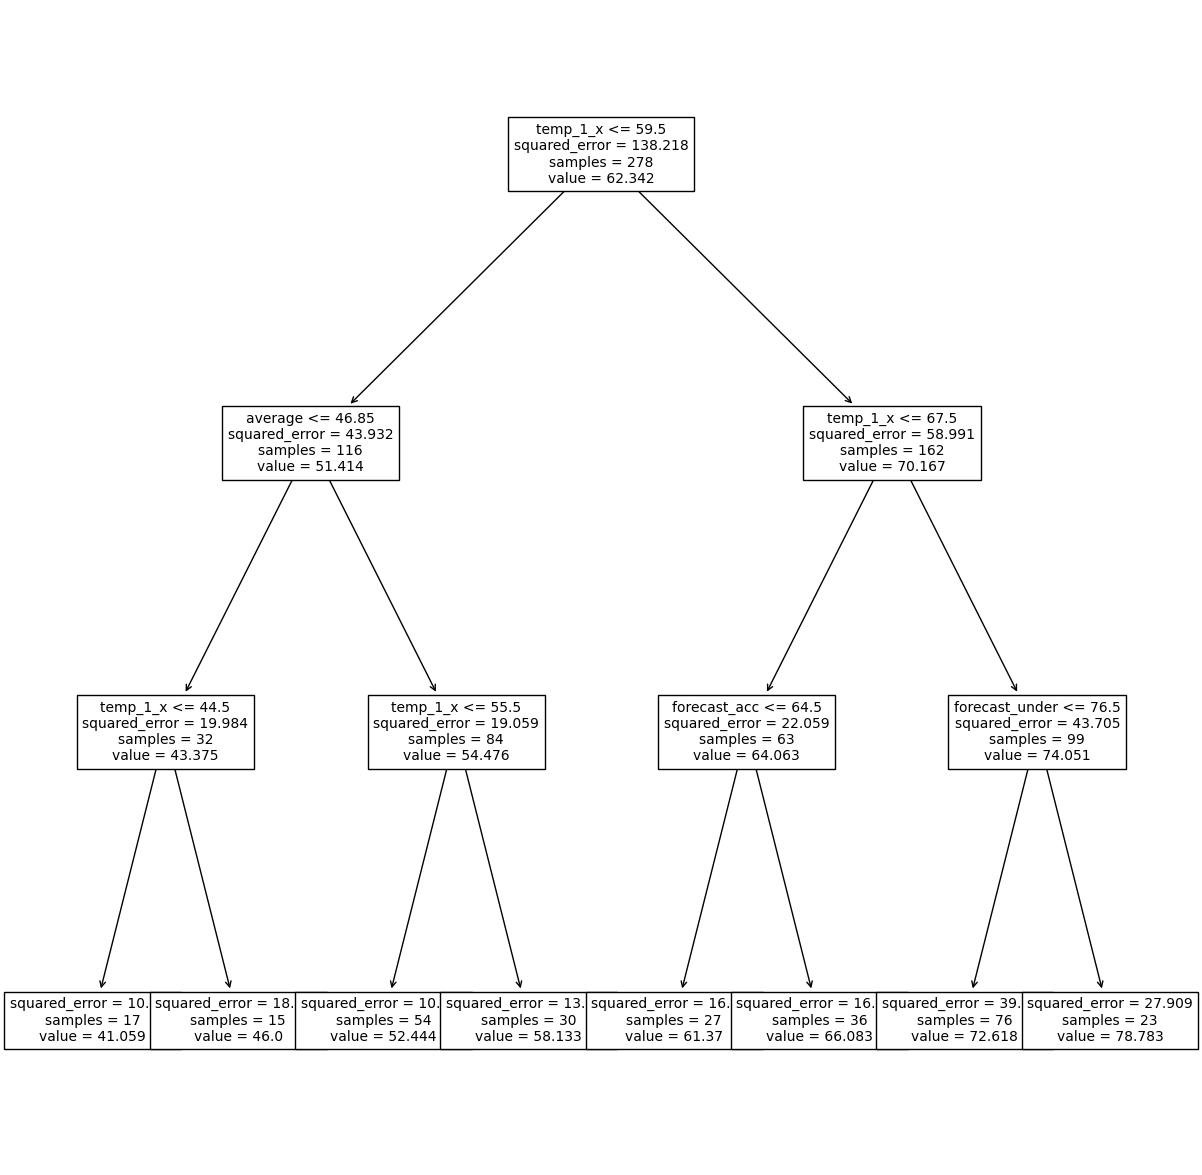

In [105]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [106]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.08841159, 0.        , 0.01060993, 0.02077097, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [107]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'temp_1_y'],
      dtype='object')

In [108]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

features  importances
4         temp_1_x     0.880208
5          average     0.088412
8   forecast_under     0.020771
7     forecast_acc     0.010610
0             year     0.000000
11             Mon     0.000000
16             Wed     0.000000
15            Tues     0.000000
14           Thurs     0.000000
13             Sun     0.000000
12             Sat     0.000000
9           friend     0.000000
10             Fri     0.000000
1            month     0.000000
6    forecast_noaa     0.000000
3           temp_2     0.000000
2              day     0.000000
17        temp_1_y     0.000000

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42) #si eliminamos el resto de las columnas el modelo es igual pero tiene menor coste computacional, el modelo se simplifica

In [110]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [111]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [112]:
df["target_clas"] = np.where(df["actual"]>59,1,0)
df[["actual", "target_clas"]].head()

actual  target_clas
0      45            0
1      44            0
2      41            0
3      40            0
4      44            0

<AxesSubplot:>

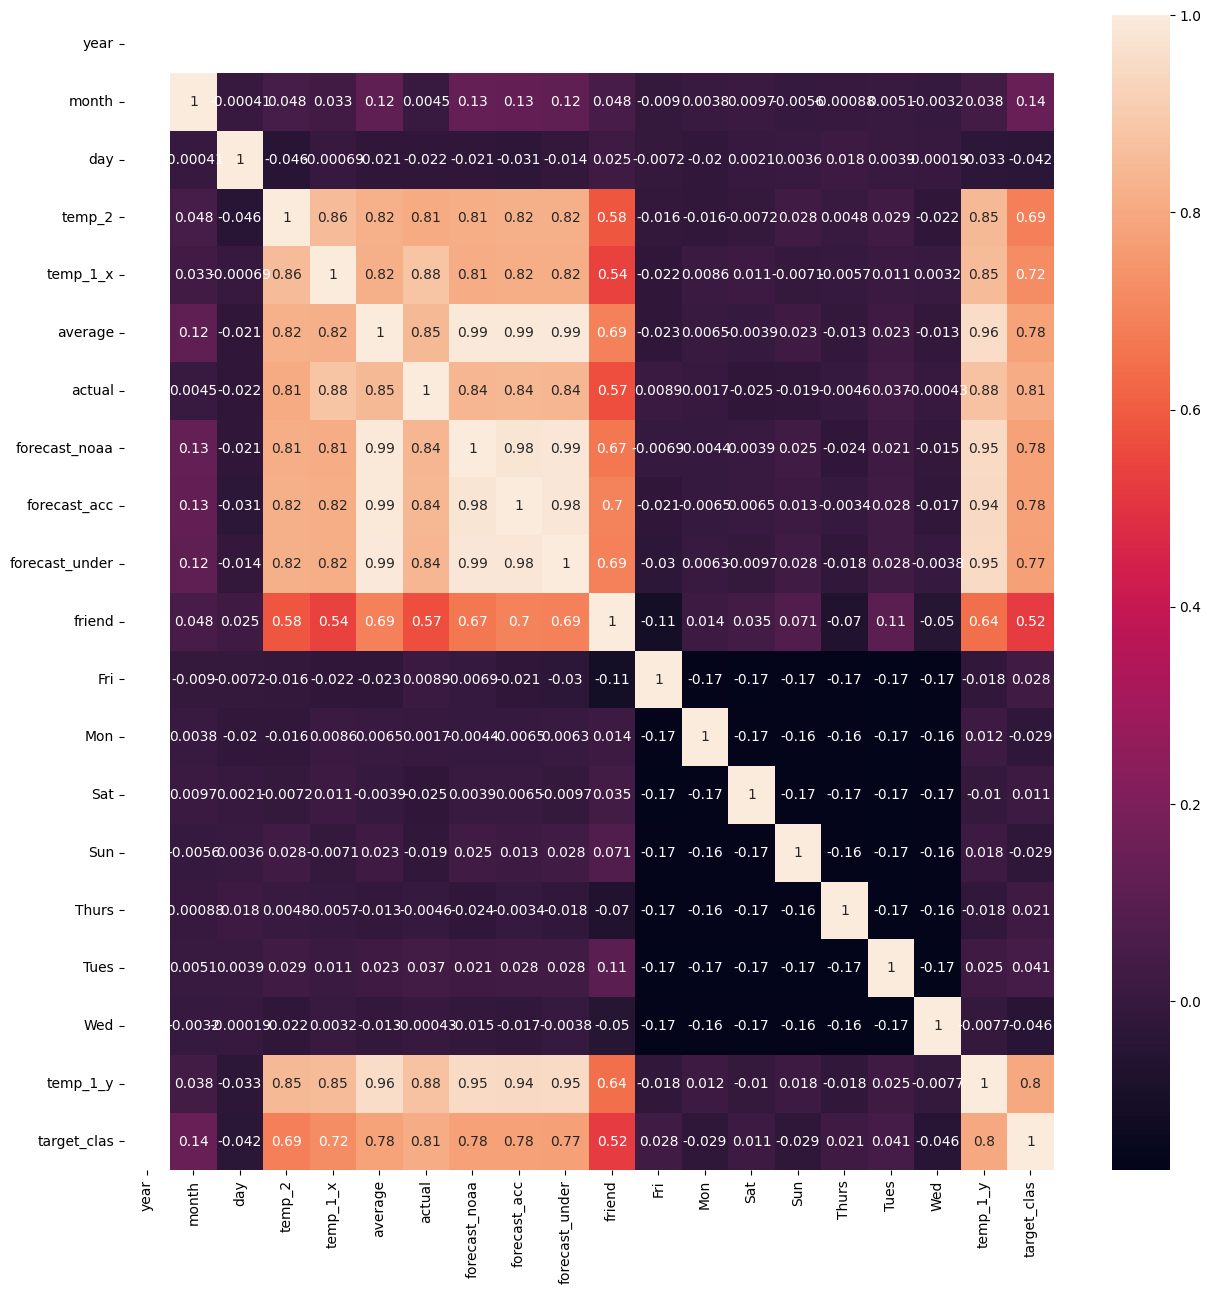

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [114]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','actual','target_clas', "Fri", "Mon", "Sat", "Sun", "Thurs", "Tues", "Wed"]), df['target_clas'], test_size=0.2, random_state=42)

In [124]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [125]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [126]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 , 0.        ])

In [127]:
pd.DataFrame({'features':X_train.columns, 'importances':dtc.feature_importances_}).sort_values('importances', ascending=False)

features  importances
3         average     0.837925
2        temp_1_x     0.098286
4   forecast_noaa     0.057931
7          friend     0.005859
0           month     0.000000
1          temp_2     0.000000
5    forecast_acc     0.000000
6  forecast_under     0.000000
8        temp_1_y     0.000000

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9142857142857143

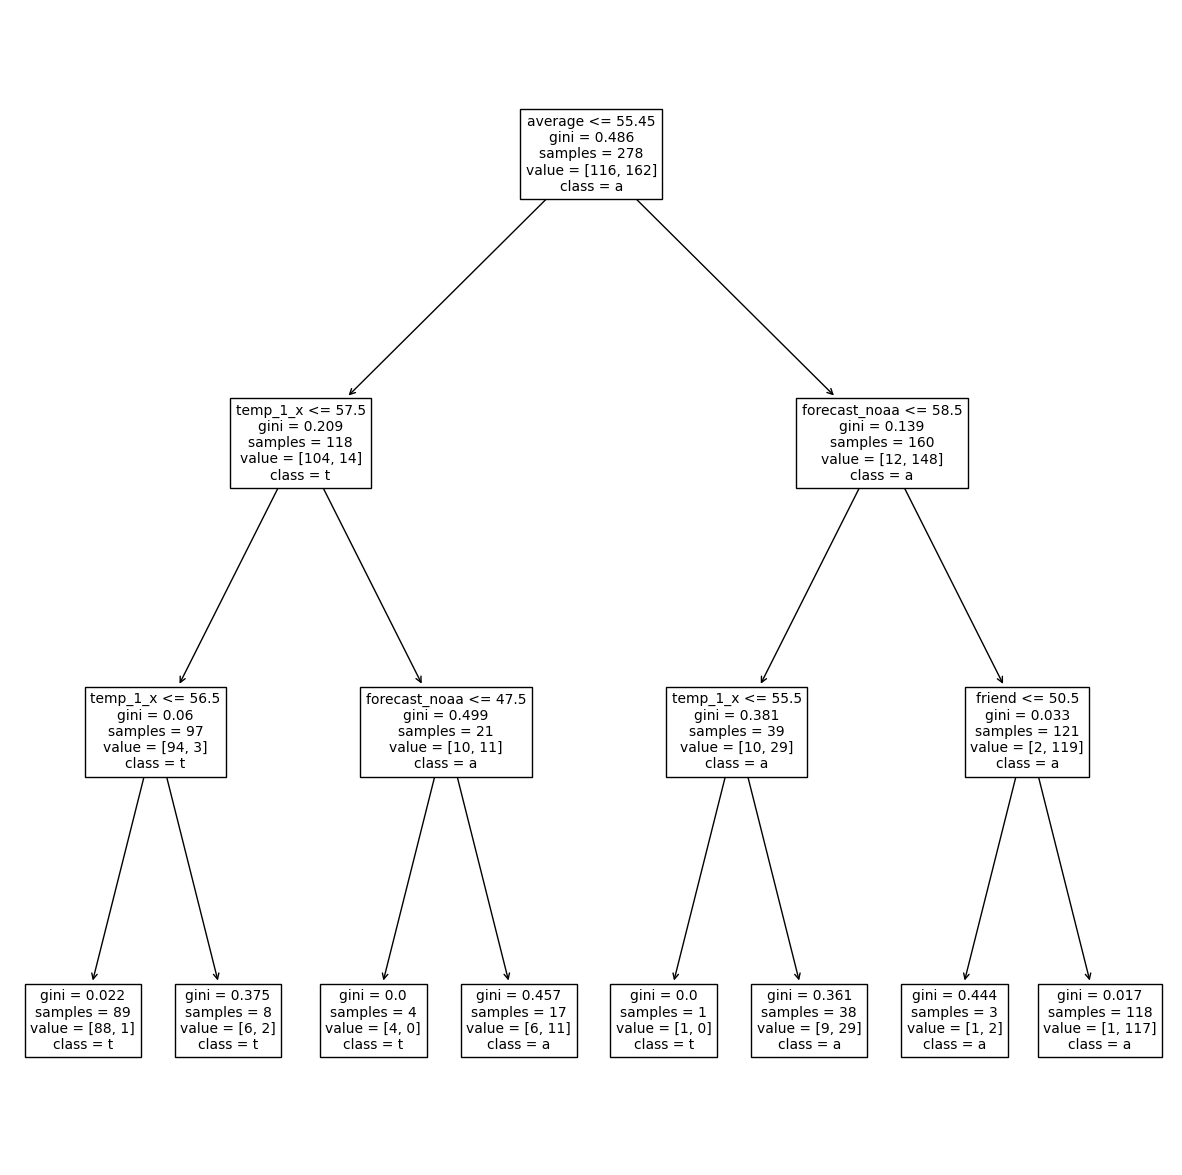

In [129]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'target_clas', fontsize=10); #max_depth cambia la profundidad de la visualización

In [130]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

/Users/administrador/Documents/Bootcamp/Lecciones/Machine_Learning/mi_entorno_virtual/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8285714285714286

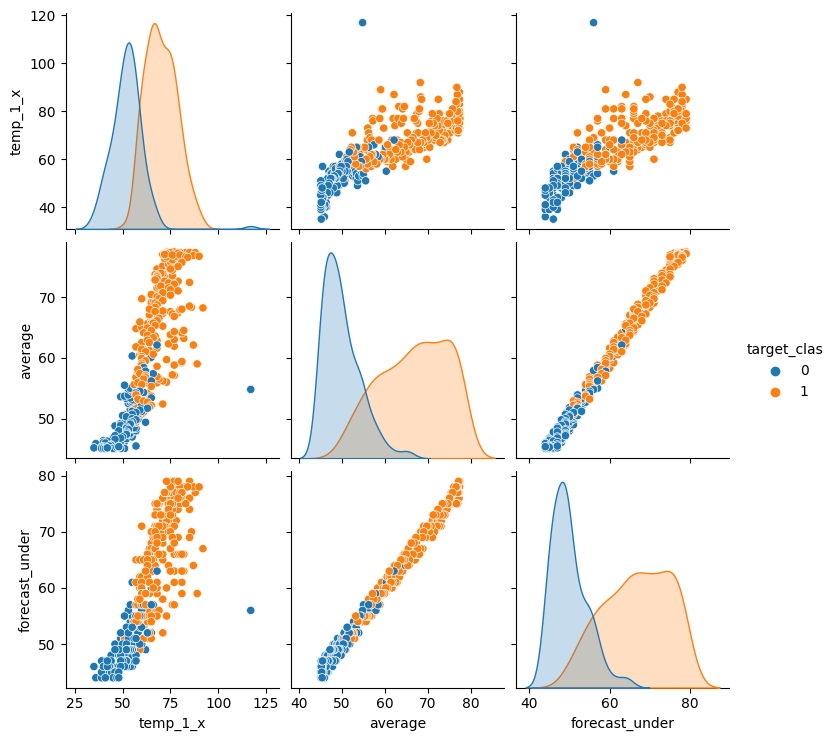

In [131]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')